# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [6]:
#1 and 2
import pandas as pd
import numpy as np
df=pd.read_csv('./data/college_completion.csv')
print(df.shape)
print(df.head())

(3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ... 

In [7]:
#3
print(pd.crosstab(df['control'],df['level']))
print(pd.crosstab(df['control'],df['level'],normalize='all'))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


There are about twice as many 4-year colleges as 2-year colleges. Most two year colleges are public, about half as many are private for profit, and a minor percentage are private non profit. About half of 4-year colleges are private non profits, while public and private profit colleges are about an even split. The biggest difference comes from the private non profit category, where an overwhelming majority of colleges are 4-years.

<Axes: xlabel='grad_100_value', ylabel='Count'>

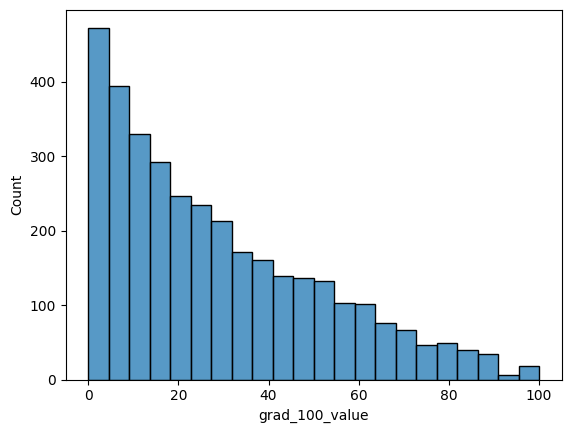

In [8]:
#4
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

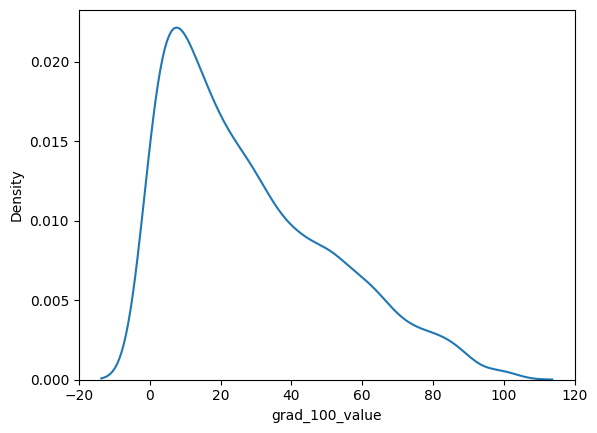

In [9]:
sns.kdeplot(df['grad_100_value'])

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


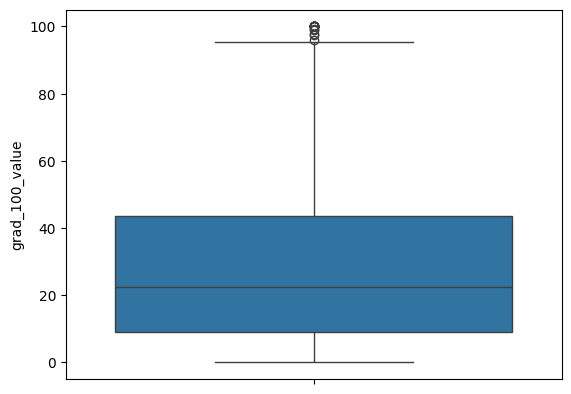

In [10]:
sns.boxplot(df['grad_100_value'])
print(df['grad_100_value'].describe())

<Axes: xlabel='grad_100_value', ylabel='Density'>

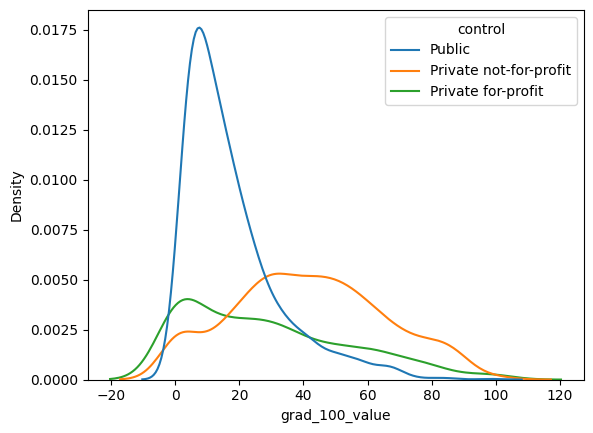

In [11]:
#5
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

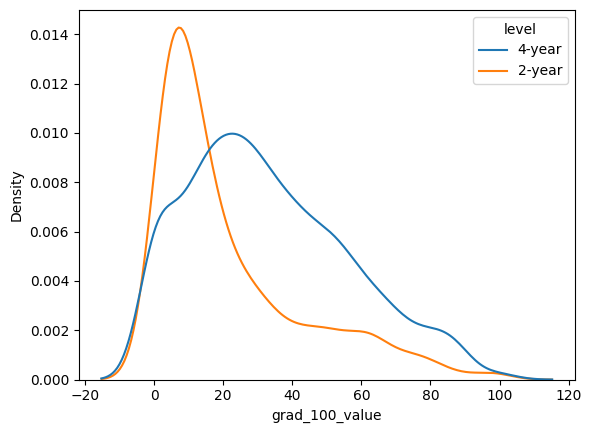

In [12]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [13]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [14]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

From the density graphs, we see 4-year institutions generally have higher graduation rates than 2-year institutions, and public institutions have generally lower graduation rates than either kind of private institution. The tables show mean graduation rates are about 10% higher for 4-year, and that private non-profit has about 12 percent higher graduation rate than private for-profit, which has a 12% higher rate than public.

<Axes: xlabel='grad_100_value', ylabel='Density'>

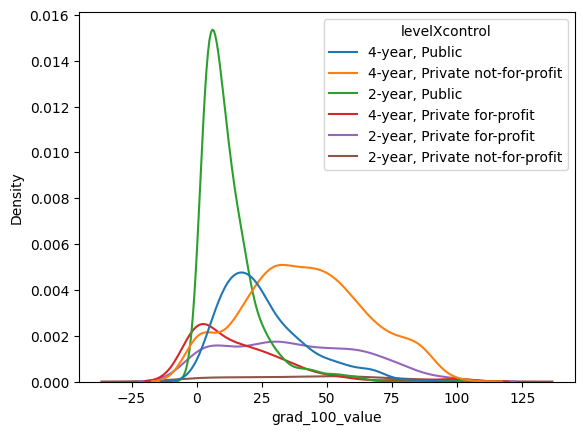

In [15]:
#6
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [16]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

Based on the density graph, it seems that 2-year public seems to have by far the lowest graduation rate, while both kinds of private non-profit have the best. The table shows length does not change the rate very much for private non-profit. For private for profit, graduation rate is actually lower for 4-year institutions, while public institutions have a higher rate with 4 years.

<Axes: xlabel='aid_value', ylabel='Density'>

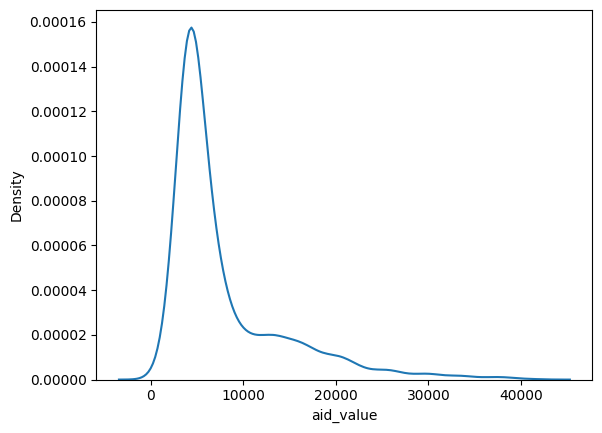

In [17]:
#7
sns.kdeplot(data=df,x='aid_value')

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

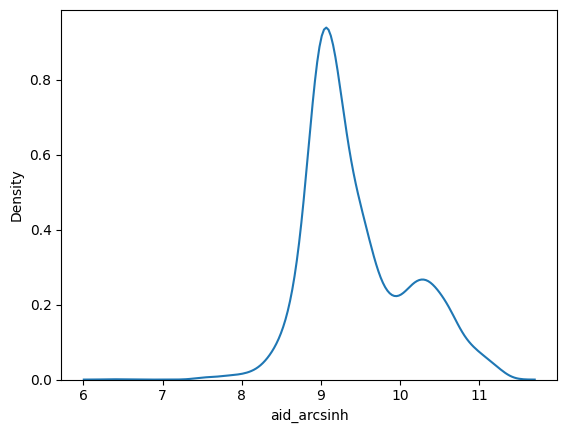

In [18]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh')

<Axes: xlabel='aid_value', ylabel='Density'>

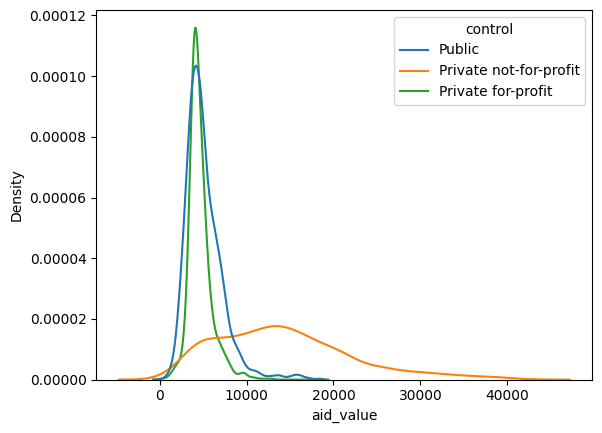

In [19]:
sns.kdeplot(data=df,x='aid_value',hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

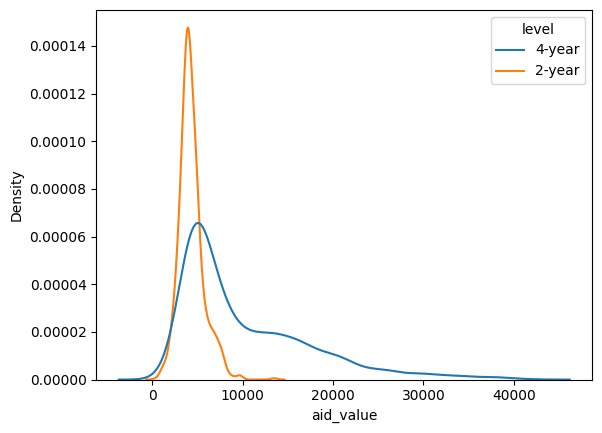

In [20]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [21]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [22]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

When comparing by control, we can see the larger peak represents public and private for-profit institutions, while the smaller peak (only in the second graph) represents private non-profit institutions, meaning private non-profit gives by far the most aid. The level variable cannot explain the distribution as well, since it does not distinguish by this type of institution - the density graph shows relatively similar distributions across 2 and 4 year institutions. The data in the tables also supports this.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

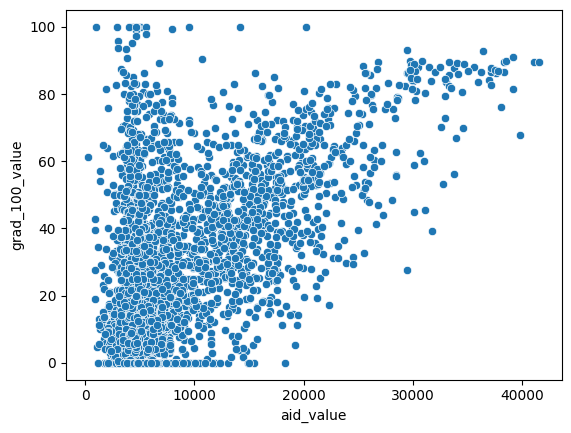

In [23]:
#8
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

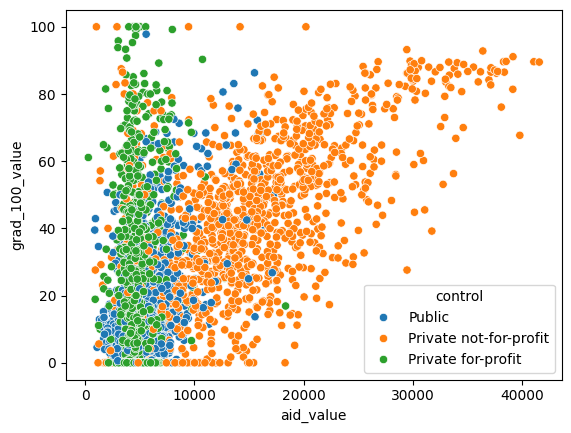

In [24]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

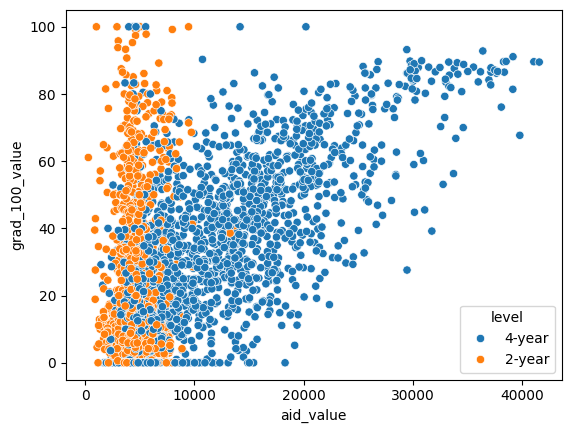

In [25]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

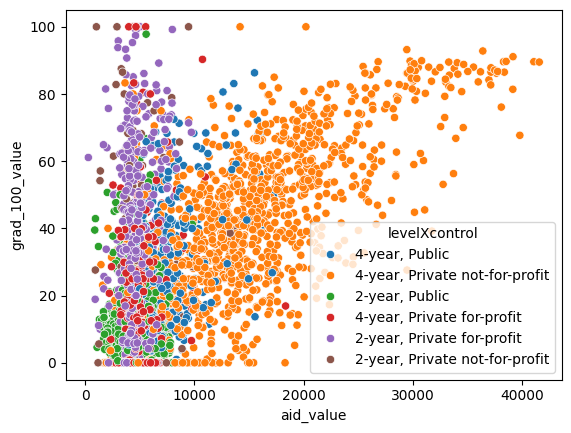

In [26]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

Looking at the scatterplot without any grouping, there appears to be some positive correlation between aid and graduation rate. Grouping by control, both private for-profit and public are concentrated in lower aid values (as seen in Q7) and do not appear to show much correlation between aid and graduation rate. Private non-profit institutions account for most of the apparent correlation between aid and graduation. Grouping by level, 2-year colleges seem concentrated around lower aid levels with little correlation with graduation, while 4-year colleges show some positive correlation. Grouping by level and control confirms these findings, showing that the positive correlation found in the first graph appears to be almost exclusively from 4-year private non-profit colleges. On a surface level, this correlation makes sense - colleges offering more aid are likely to attract better students, and students with more aid may have an easier time getting through college. It is interesting that only one kind of college seems to show this trend - potentially the best institutions tend to fit this category.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. I used the medicare current beneficiary survey data. I downloaded the data from the link provided and specifically looked at the fall 2022 data.
2. The data dictionary has some documentation for missing values. The description/label column lists all values present for each variable, including missing values if applicable. For categorical values, the dictionary describes each possible value as well as the associated codes. The data contains very few numeric variables, the only ones being year (all values being 2022) and a set of 100 columns containing PUF weights (I was unable to use the codebook to determine what these values represented). Overall, this data dictionary seems to lack some information, and is not organized in a way that is easy to read. It also generally does not give any useful information that would help a user understand what each variable does (the one I found was in the file called codebooks, but there may have been another with more information). The dataset also seems inconsistent - some categorical values are stored as categorical values, while some are stored as numerical values (while the categories use numbers, there are still a limited number of them so they should be caegories).
3. I picked some demographic variables and some variables measuring satisfaction. I wanted to see how these variables would affect satisfaction with their medical care. Since I was unable to use the codebook to understand the numerical weight variables at the end, I chose some of these to interpret as well (and some of the later graphs only really make sense using numerical values).

In [105]:
#3
import matplotlib.pyplot as plt
df2=pd.read_csv('./data/sfpuf2022_1_fall.csv')
print(df2.shape)
print(df2.head())
#Rename relevant columns with more intuitive names
df2.rename(columns={'ACC_MCQUALTY':'quality'},inplace=True)
df2.rename(columns={'ACC_MCCOSTS':'cost'},inplace=True)
df2.rename(columns={'ACC_MCINFO':'info'},inplace=True)
df2.rename(columns={'DEM_AGE':'age'},inplace=True)
df2.rename(columns={'DEM_INCOME':'income'},inplace=True)
#replace categories with actual values
df2['quality']=df2['quality'].replace({'1':'Very Satisfied','2':'Satisfied','3':'Dissatisfied','4':'Very Dissatisfied','5':'No experience','D':np.nan,'R':np.nan})
df2['cost']=df2['cost'].replace({'1':'Very Satisfied','2':'Satisfied','3':'Dissatisfied','4':'Very Dissatisfied','5':'No experience','D':np.nan,'R':np.nan})
df2['info']=df2['info'].replace({'1':'Very Satisfied','2':'Satisfied','3':'Dissatisfied','4':'Very Dissatisfied','5':'No experience','D':np.nan,'R':np.nan})
df2['age']=df2['age'].replace({1:'<65',2:'65-74',3:'75+'})
df2['income']=df2['income'].replace({1:'<25k',2:'>=25k'})

<ipython-input-105-b93ac93960bb>:3: DtypeWarning: Columns (43,46,49,50,51,52,53,64,68,70,73,74,76,77,81,83,84,85,86,87,88,89,90,92,96,99,100,101,105,106,107,110,112,113,116,118,119,120,123,124,125,126,127,129,136,137,138,139,140,141,143,144,149,150,151,157,158,162,166,170,171,175,186,187,188,189,190,193,195,196,198,199,200,201,202,204,205,206,212,214,215,216,217,218,219,220,222,223,224,225,226,227,228,229,231,232,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('./data/sfpuf2022_1_fall.csv')


(12477, 342)
     PUF_ID  SURVEYYR  VERSION  ADM_H_MEDSTA  ADM_H_GHPSW  ADM_H_PDRS  \
0  22000000      2022        1             2            1         1.0   
1  22000003      2022        1             1            1         1.0   
2  22000004      2022        1             1            2         1.0   
3  22000011      2022        1             1            1         1.0   
4  22000018      2022        1             1            1         NaN   

   ADM_OP_MDCD  ADM_DUAL_FLAG_YR  ADM_FFS_FLAG_YR  ADM_MA_FLAG_YR  ...  \
0            2                 3                1               3  ...   
1            1                 1                1               3  ...   
2            1                 1                3               1  ...   
3            4                 3                2               2  ...   
4            1                 1                1               2  ...   

        PUFF091       PUFF092      PUFF093       PUFF094       PUFF095  \
0   1596.191490    343.802164

In [73]:
df2['quality'].value_counts()

,count
quality,
Very Satisfied,6145
Satisfied,5425
Dissatisfied,523
No experience,204
Very Dissatisfied,135


In [79]:
df2['income'].value_counts()

,count
income,
>=25k,8353
<25k,4124


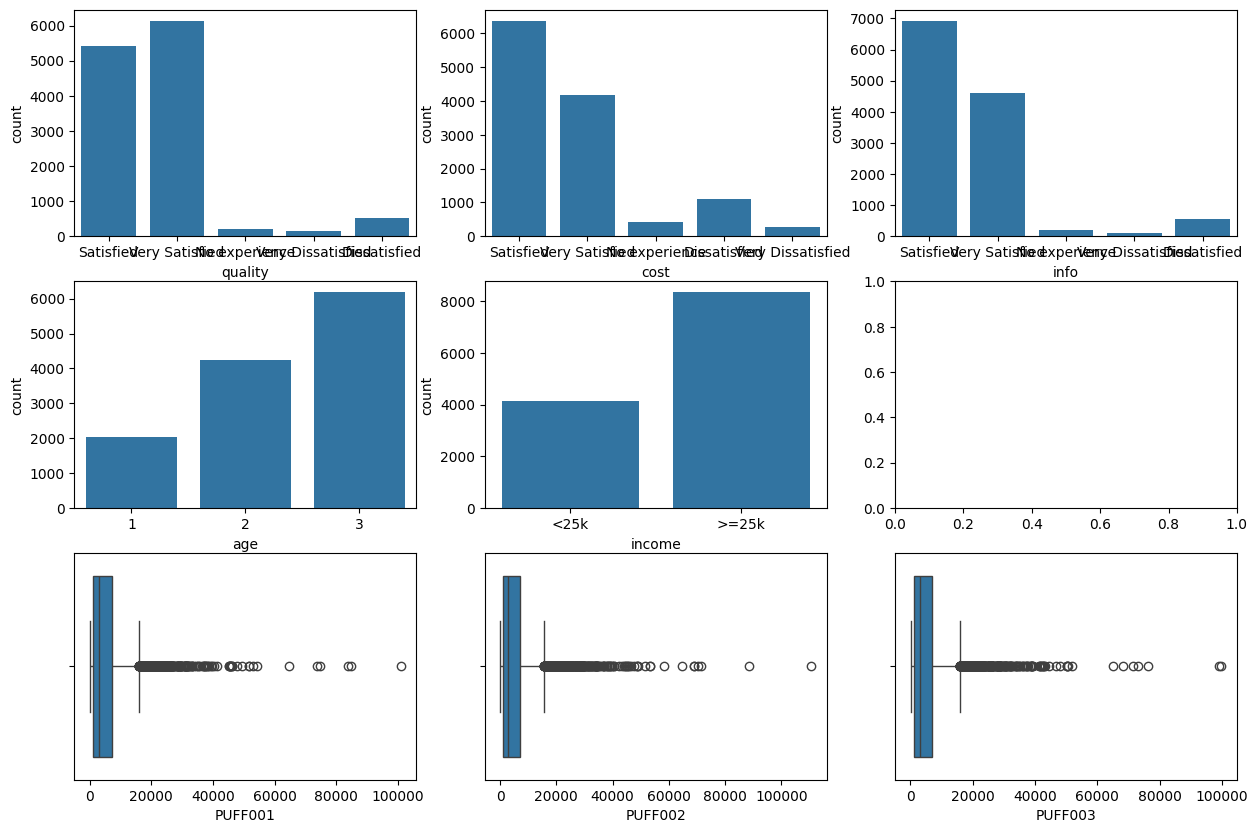

In [93]:
#4
fig,axes=plt.subplots(3,3,figsize=(15,10))
sns.countplot(data=df2,x='quality',ax=axes[0,0])
sns.countplot(data=df2,x='cost',ax=axes[0,1])
sns.countplot(data=df2,x='info',ax=axes[0,2])
sns.countplot(data=df2,x='age',ax=axes[1,0])
sns.countplot(data=df2,x='income',ax=axes[1,1])
sns.boxplot(data=df2,x='PUFF001',ax=axes[2,0])
sns.boxplot(data=df2,x='PUFF002',ax=axes[2,1])
sns.boxplot(data=df2,x='PUFF003',ax=axes[2,2])
plt.show()

For the satisfaction variables, patients seem to generally report high satisfaction with various aspects of their care. The PUFF variables appear to be mostly below 20k, with a few outliers as high as 100k+.

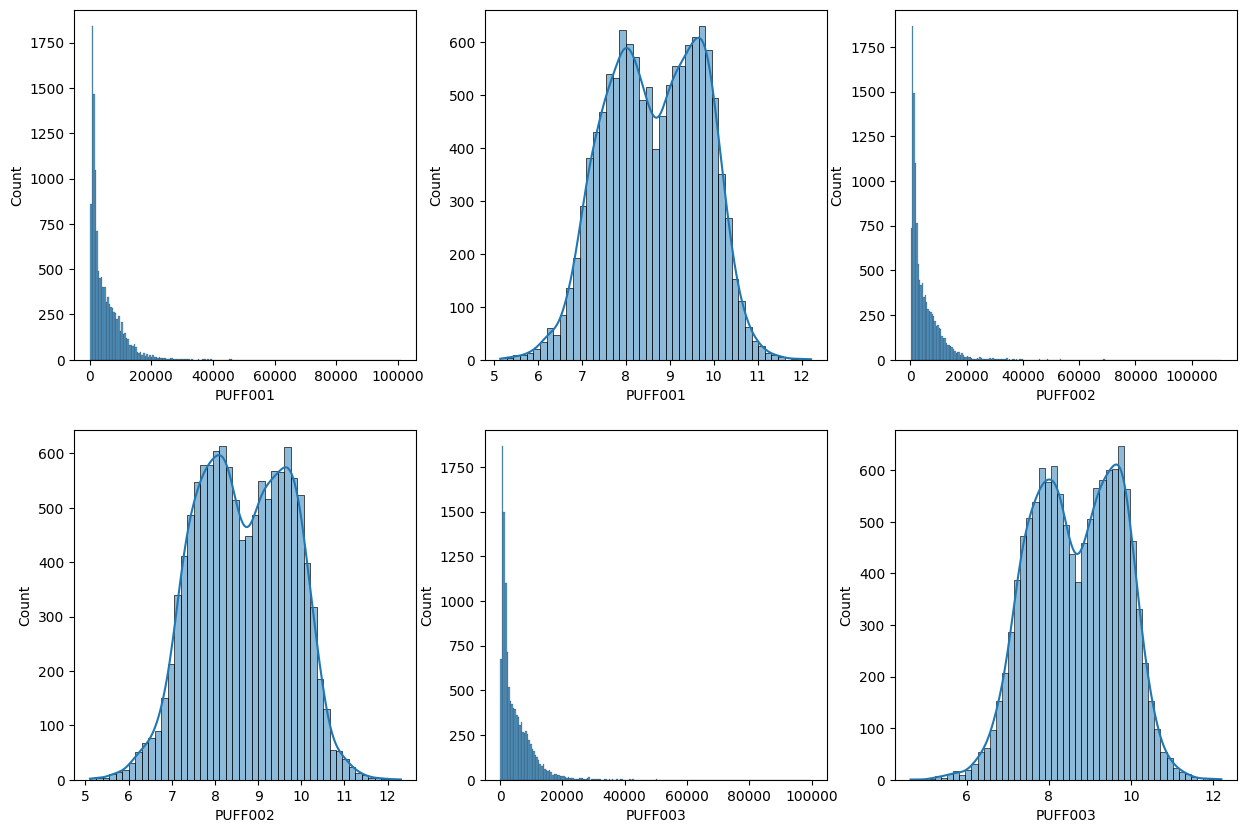

In [99]:
#5 make a histogram
fig,axes=plt.subplots(2,3,figsize=(15,10))
sns.histplot(df2['PUFF001'],ax=axes[0,0])
sns.histplot(np.arcsinh(df2['PUFF001']),kde=True,ax=axes[0,1])
sns.histplot(df2['PUFF002'],ax=axes[0,2])
sns.histplot(np.arcsinh(df2['PUFF002']),kde=True,ax=axes[1,0])
sns.histplot(df2['PUFF003'],ax=axes[1,1])
sns.histplot(np.arcsinh(df2['PUFF003']),kde=True,ax=axes[1,2])
plt.show()

After transforming the data, there appears to be two peaks. All of the PUFF variables seem to have nearly identical distributions.

<Axes: xlabel='PUFF002', ylabel='PUFF003'>

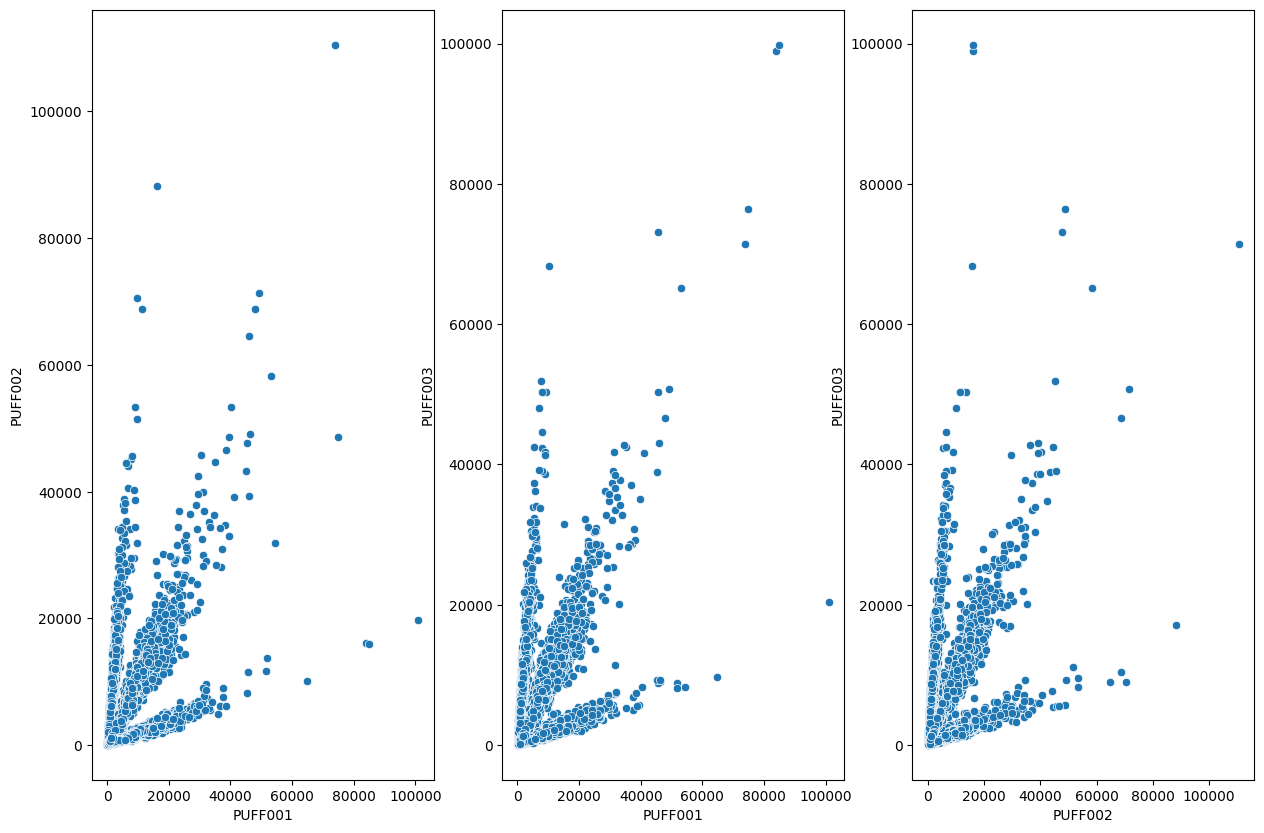

In [100]:
#6
fig,axes=plt.subplots(1,3,figsize=(15,10))
sns.scatterplot(data=df2,x='PUFF001',y='PUFF002',ax=axes[0])
sns.scatterplot(data=df2,x='PUFF001',y='PUFF003',ax=axes[1])
sns.scatterplot(data=df2,x='PUFF002',y='PUFF003',ax=axes[2])

For these variables, they appear to all be somewhat positively correlated. When making a scatterplot between any of the variables (or any of the PUFF variables), there appear to be three different lines (all positively correlated but with different slopes).

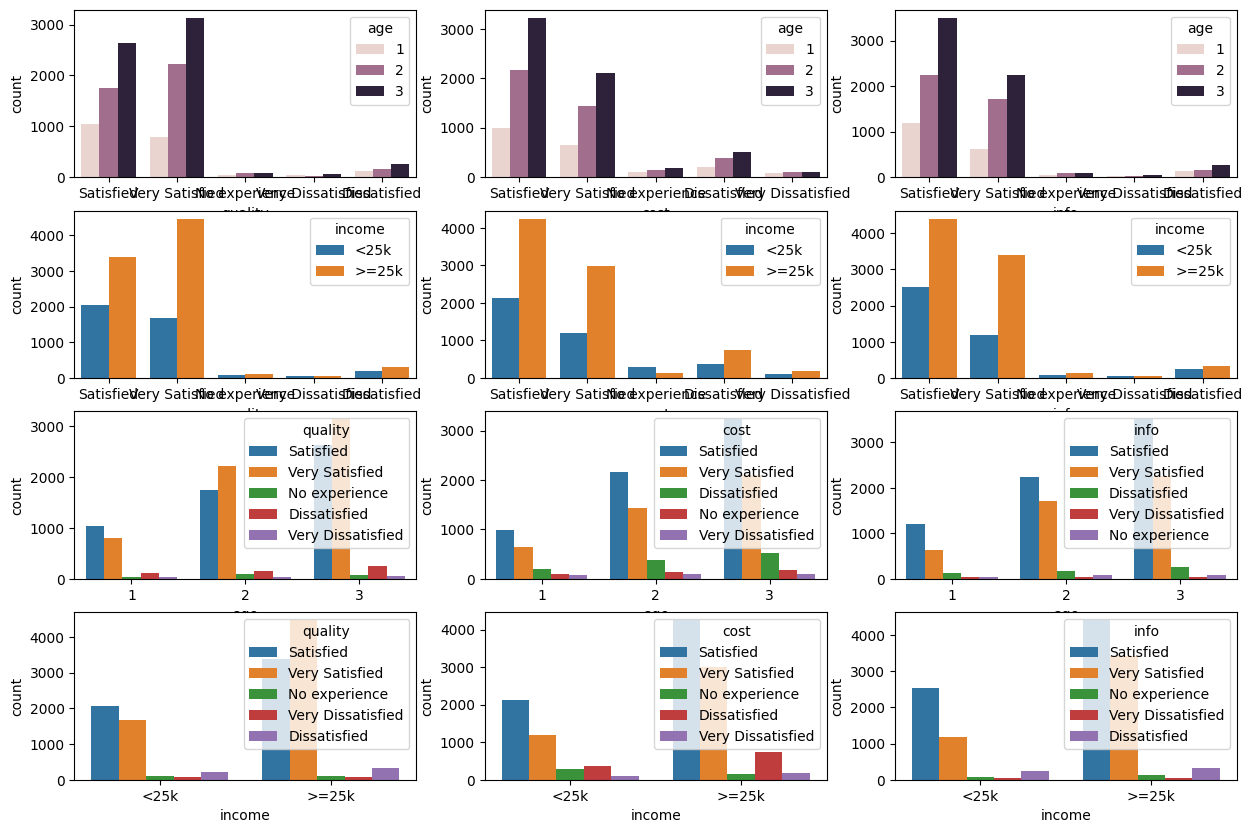

In [102]:
fig,axes=plt.subplots(4,3,figsize=(15,10))
sns.countplot(data=df2,x='quality',hue='age',ax=axes[0,0])
sns.countplot(data=df2,x='cost',hue='age',ax=axes[0,1])
sns.countplot(data=df2,x='info',hue='age',ax=axes[0,2])
sns.countplot(data=df2,x='quality',hue='income',ax=axes[1,0])
sns.countplot(data=df2,x='cost',hue='income',ax=axes[1,1])
sns.countplot(data=df2,x='info',hue='income',ax=axes[1,2])
sns.countplot(data=df2,x='age',hue='quality',ax=axes[2,0])
sns.countplot(data=df2,x='age',hue='cost',ax=axes[2,1])
sns.countplot(data=df2,x='age',hue='info',ax=axes[2,2])
sns.countplot(data=df2,x='income',hue='quality',ax=axes[3,0])
sns.countplot(data=df2,x='income',hue='cost',ax=axes[3,1])
sns.countplot(data=df2,x='income',hue='info',ax=axes[3,2])
plt.show()

Since all of these were categorical, I tried using grouped bar graphs to compare each demographic variable with each satisfaction variable. Overall, there do not seem to be many clear patterns, partially because the number of people answering satisfied or very satisfied is much larger than the other groups, making this the most represented category on any of the graphs. Looking at the second row of graphs, it generally seems like satisfaction decreases along with income (the higher satisfaction categories are mostly higher income, while lower satisfaction is more equal). This suggests that while people are generally satisfied with quality of their care, dissatisfaction is more likely to occur among lower income patients.

In [111]:
#7 Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.
df2.loc[:,['quality','cost','info','age','income']].describe()

,quality,cost,info,age,income
count,12432,12386,12411,12477,12477
unique,5,5,5,3,2
top,Very Satisfied,Satisfied,Satisfied,75+,>=25k
freq,6145,6378,6933,6184,8353


In [110]:
df2.loc[:,['quality','income']].groupby('quality').describe()

income                    
                   count unique    top  freq
quality                                     
Dissatisfied         523      2  >=25k   318
No experience        204      2  >=25k   110
Satisfied           5425      2  >=25k  3374
Very Dissatisfied    135      2  >=25k    68
Very Satisfied      6145      2  >=25k  4464

In [115]:
df2.loc[:,['cost','income']].groupby('cost').describe()

income                    
                   count unique    top  freq
cost                                        
Dissatisfied        1114      2  >=25k   740
No experience        429      2   <25k   283
Satisfied           6378      2  >=25k  4246
Very Dissatisfied    280      2  >=25k   177
Very Satisfied      4185      2  >=25k  2991

In [116]:
df2.loc[:,['info','income']].groupby('info').describe()

income                    
                   count unique    top  freq
info                                        
Dissatisfied         565      2  >=25k   323
No experience        214      2  >=25k   125
Satisfied           6933      2  >=25k  4407
Very Dissatisfied    111      2  >=25k    58
Very Satisfied      4588      2  >=25k  3411

In [112]:
df2.loc[:,['PUFF001','PUFF002','PUFF003']].describe()

,PUFF001,PUFF002,PUFF003
count,12477.000000,12477.000000,12477.000000
mean,4934.200915,4943.963864,4941.968478
std,5482.254998,5645.867241,5517.819735
min,85.498035,82.302586,51.609087
25%,1235.682572,1232.918274,1236.308037
50%,2933.357290,2821.314259,2934.913245
75%,7136.304568,7029.997232,7091.855900
max,100929.756990,110531.774580,99841.095099


In [113]:
df2.loc[:,['PUFF001','PUFF002','PUFF003']].cov()

,PUFF001,PUFF002,PUFF003
PUFF001,3.005512e+07,1.354673e+07,1.262054e+07
PUFF002,1.354673e+07,3.187582e+07,1.263500e+07
PUFF003,1.262054e+07,1.263500e+07,3.044633e+07


The covariance table shows that the PUFF variables are all highly correlated. For the categorical variables, there do not seem to be any clear patterns. This may be in part due to how the variables are represented. For instance, income is divided into only two categories, which may hide the relationship it has with satisfaction. Some of the categories also have a relatively low sample size, making it difficult to draw conclusions.